In [2]:
# Initial imports
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import the data

In [3]:
# Load the water_quality_data.csv dataset for monitoring station 0611.

file_path_1 = "../Ritu_Gothwal_Copy/Water_Quality_Data/Lake Sammamish-0611_1_1_1994_to_9_30_2022.csv"
#df = pd.read_csv(file_path, skiprows=1)[:-2]
WQ_0611_df = pd.read_csv(file_path_1,skiprows=12, encoding='unicode_escape')
WQ_0611_df.head()

,CollectDate,SampleNum,Depth (m),Ammmonia Nitrogen (mg/L),Ammmonia Nitrogen Qualifier*,AN MDL (mg/L),Conductivity (µmhos/cm),Cond Qualifier*,Cond MDL (µmhos/cm),Dissolved Oxygen (mg/L),...,Temperature Qualifier*,Total Nitrogen (mg/L),TN Qualifier*,TN MDL (mg/L),Total Phosphorus (mg/L),TP Qualifier*,TP MDL (mg/L),Total Alkalinity (mg/L),Total Alkalinity Qualifier*,Total Alkalinity MDL (mg/L)
0,1/6/1994,L2704-18,1,0.02,<MDL,0.02,103.0,NaN,NaN,9.15,...,NaN,0.41,NaN,0.05,0.017,NaN,0.005,42,NaN,0.2
1,1/6/1994,L2704-19,5,NaN,NaN,NaN,104.0,NaN,NaN,8.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/6/1994,L2704-20,10,0.02,<MDL,0.02,102.0,NaN,NaN,9.00,...,NaN,0.44,NaN,0.05,0.019,NaN,0.005,42,NaN,0.2
3,1/6/1994,L2704-21,15,NaN,NaN,NaN,105.0,NaN,NaN,9.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/6/1994,L2704-22,20,NaN,NaN,NaN,104.0,NaN,NaN,9.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
WQ_0611_df.shape

(10039, 35)

In [5]:
WQ_0611_df.count()

CollectDate                        10039
SampleNum                          10039
Depth (m)                          10016
Ammmonia Nitrogen (mg/L)            2544
Ammmonia Nitrogen Qualifier*        2205
AN MDL (mg/L)                       2659
Conductivity (µmhos/cm)             8135
Cond Qualifier*                      445
Cond MDL (µmhos/cm)                 6020
Dissolved Oxygen (mg/L)             8052
DO Qualifier*                        809
DO MDL (mg/L)                       6014
Ecoli                                170
Ecoli Qualifier*                       5
Fecal Coliform (CFU/100ml)           316
Fecal Coliform Qualifier*              3
Nitrate Nitrite (mg/L)              2570
Nitrate Nitrite Qualifier*           581
Nitrate Nitrite MDL (mg/L)          2660
Orthophosphate Phosphate (mg/L)     2479
OP Qualifier*                       1796
OP MDL (mg/L)                       2657
pH                                  8145
pH Qualifier*                        435
Temperature (°C)

In [6]:
# Dropping the columns which are not very useful for the analysis. 
# df.drop(['col1','col2','col5','colN'], axis=1, inplace=True) 

WQ_0611_df = WQ_0611_df.drop(columns=["Depth (m)", "Ammmonia Nitrogen Qualifier*", "Cond Qualifier*", "DO Qualifier*", 
                                "Ecoli Qualifier*", "Fecal Coliform Qualifier*","Nitrate Nitrite Qualifier*", "OP Qualifier*", 
                                "pH Qualifier*","Temperature Qualifier*", "TN Qualifier*", "TN Qualifier*","TP Qualifier*", "Total Alkalinity Qualifier*" ])

# Dropping the columns with heading MDL in it as it is just reporting the minimum detection limit of the method, which is not actually usefull for this analysis.
WQ_0611_df= WQ_0611_df.drop(columns=["AN MDL (mg/L)", "Cond MDL (µmhos/cm)", "DO MDL (mg/L)", "Nitrate Nitrite MDL (mg/L)",
                                  "OP MDL (mg/L)", "TN MDL (mg/L)", "TP MDL (mg/L)", "Total Alkalinity MDL (mg/L)" ])

print(WQ_0611_df.shape)
WQ_0611_df.head()


(10039, 14)


,CollectDate,SampleNum,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Ecoli,Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),Total Alkalinity (mg/L)
0,1/6/1994,L2704-18,0.02,103.0,9.15,NaN,1.0,0.27,0.011,7.4,7.4,0.41,0.017,42
1,1/6/1994,L2704-19,NaN,104.0,8.98,NaN,NaN,NaN,NaN,7.4,7.3,NaN,NaN,NaN
2,1/6/1994,L2704-20,0.02,102.0,9.00,NaN,NaN,0.29,0.012,7.4,7.3,0.44,0.019,42
3,1/6/1994,L2704-21,NaN,105.0,9.21,NaN,NaN,NaN,NaN,7.4,7.3,NaN,NaN,NaN
4,1/6/1994,L2704-22,NaN,104.0,9.20,NaN,NaN,NaN,NaN,7.4,7.3,NaN,NaN,NaN


In [7]:
WQ_0611_df.count()

CollectDate                        10039
SampleNum                          10039
Ammmonia Nitrogen (mg/L)            2544
Conductivity (µmhos/cm)             8135
Dissolved Oxygen (mg/L)             8052
Ecoli                                170
Fecal Coliform (CFU/100ml)           316
Nitrate Nitrite (mg/L)              2570
Orthophosphate Phosphate (mg/L)     2479
pH                                  8145
Temperature (°C)                    8155
Total Nitrogen (mg/L)               2647
Total Phosphorus (mg/L)             2750
Total Alkalinity (mg/L)              390
dtype: int64

In [8]:
WQ_0611_df.isnull().sum()

CollectDate                           0
SampleNum                             0
Ammmonia Nitrogen (mg/L)           7495
Conductivity (µmhos/cm)            1904
Dissolved Oxygen (mg/L)            1987
Ecoli                              9869
Fecal Coliform (CFU/100ml)         9723
Nitrate Nitrite (mg/L)             7469
Orthophosphate Phosphate (mg/L)    7560
pH                                 1894
Temperature (°C)                   1884
Total Nitrogen (mg/L)              7392
Total Phosphorus (mg/L)            7289
Total Alkalinity (mg/L)            9649
dtype: int64

In [9]:
#"Ecoli","Fecal Coliform (CFU/100ml)", 

WQ_0611_df_1= WQ_0611_df.drop(columns=["Ecoli", "Total Alkalinity (mg/L)"])

WQ_0611_df_1.head()

,CollectDate,SampleNum,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L)
0,1/6/1994,L2704-18,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.41,0.017
1,1/6/1994,L2704-19,NaN,104.0,8.98,NaN,NaN,NaN,7.4,7.3,NaN,NaN
2,1/6/1994,L2704-20,0.02,102.0,9.00,NaN,0.29,0.012,7.4,7.3,0.44,0.019
3,1/6/1994,L2704-21,NaN,105.0,9.21,NaN,NaN,NaN,7.4,7.3,NaN,NaN
4,1/6/1994,L2704-22,NaN,104.0,9.20,NaN,NaN,NaN,7.4,7.3,NaN,NaN


In [10]:
WQ_0611_df_1.dtypes

CollectDate                         object
SampleNum                           object
Ammmonia Nitrogen (mg/L)           float64
Conductivity (µmhos/cm)            float64
Dissolved Oxygen (mg/L)            float64
Fecal Coliform (CFU/100ml)         float64
Nitrate Nitrite (mg/L)             float64
Orthophosphate Phosphate (mg/L)    float64
pH                                  object
Temperature (°C)                   float64
Total Nitrogen (mg/L)              float64
Total Phosphorus (mg/L)            float64
dtype: object

In [11]:
# convert string to datetime
WQ_0611_df_1["CollectDate"] = pd.to_datetime(WQ_0611_df_1["CollectDate"])
WQ_0611_df_1.head()


,CollectDate,SampleNum,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L)
0,1994-01-06,L2704-18,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.41,0.017
1,1994-01-06,L2704-19,NaN,104.0,8.98,NaN,NaN,NaN,7.4,7.3,NaN,NaN
2,1994-01-06,L2704-20,0.02,102.0,9.00,NaN,0.29,0.012,7.4,7.3,0.44,0.019
3,1994-01-06,L2704-21,NaN,105.0,9.21,NaN,NaN,NaN,7.4,7.3,NaN,NaN
4,1994-01-06,L2704-22,NaN,104.0,9.20,NaN,NaN,NaN,7.4,7.3,NaN,NaN


In [12]:
WQ_0611_df_1.dtypes

CollectDate                        datetime64[ns]
SampleNum                                  object
Ammmonia Nitrogen (mg/L)                  float64
Conductivity (µmhos/cm)                   float64
Dissolved Oxygen (mg/L)                   float64
Fecal Coliform (CFU/100ml)                float64
Nitrate Nitrite (mg/L)                    float64
Orthophosphate Phosphate (mg/L)           float64
pH                                         object
Temperature (°C)                          float64
Total Nitrogen (mg/L)                     float64
Total Phosphorus (mg/L)                   float64
dtype: object

In [13]:
df_1 = WQ_0611_df_1 
df_1.head()

,CollectDate,SampleNum,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L)
0,1994-01-06,L2704-18,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.41,0.017
1,1994-01-06,L2704-19,NaN,104.0,8.98,NaN,NaN,NaN,7.4,7.3,NaN,NaN
2,1994-01-06,L2704-20,0.02,102.0,9.00,NaN,0.29,0.012,7.4,7.3,0.44,0.019
3,1994-01-06,L2704-21,NaN,105.0,9.21,NaN,NaN,NaN,7.4,7.3,NaN,NaN
4,1994-01-06,L2704-22,NaN,104.0,9.20,NaN,NaN,NaN,7.4,7.3,NaN,NaN


In [14]:
# Replacing the NaN values:

#df_3 = df_1.groupby(["CollectDate", "Ammmonia Nitrogen (mg/L)"]).apply(lambda x:x.fillna(x.mean()))
df_3 = df_1.groupby(["CollectDate"]).apply(lambda x:x.fillna(x.mean()))
df_3.head()


,CollectDate,SampleNum,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L)
0,1994-01-06,L2704-18,0.02,103.0,9.15,1.0,0.2700,0.01100,7.4,7.4,0.410,0.017
1,1994-01-06,L2704-19,0.02,104.0,8.98,1.0,0.2775,0.01175,7.4,7.3,0.415,0.019
2,1994-01-06,L2704-20,0.02,102.0,9.00,1.0,0.2900,0.01200,7.4,7.3,0.440,0.019
3,1994-01-06,L2704-21,0.02,105.0,9.21,1.0,0.2775,0.01175,7.4,7.3,0.415,0.019
4,1994-01-06,L2704-22,0.02,104.0,9.20,1.0,0.2775,0.01175,7.4,7.3,0.415,0.019


In [15]:
df_3.count()

CollectDate                        10039
SampleNum                          10039
Ammmonia Nitrogen (mg/L)            8562
Conductivity (µmhos/cm)             9970
Dissolved Oxygen (mg/L)             9958
Fecal Coliform (CFU/100ml)          3024
Nitrate Nitrite (mg/L)              8681
Orthophosphate Phosphate (mg/L)     8584
pH                                  8145
Temperature (°C)                    9989
Total Nitrogen (mg/L)               8626
Total Phosphorus (mg/L)             9960
dtype: int64

In [16]:
df_3 = df_3.dropna()
df_3.count()

CollectDate                        2664
SampleNum                          2664
Ammmonia Nitrogen (mg/L)           2664
Conductivity (µmhos/cm)            2664
Dissolved Oxygen (mg/L)            2664
Fecal Coliform (CFU/100ml)         2664
Nitrate Nitrite (mg/L)             2664
Orthophosphate Phosphate (mg/L)    2664
pH                                 2664
Temperature (°C)                   2664
Total Nitrogen (mg/L)              2664
Total Phosphorus (mg/L)            2664
dtype: int64

In [17]:
df_3.dtypes

CollectDate                        datetime64[ns]
SampleNum                                  object
Ammmonia Nitrogen (mg/L)                  float64
Conductivity (µmhos/cm)                   float64
Dissolved Oxygen (mg/L)                   float64
Fecal Coliform (CFU/100ml)                float64
Nitrate Nitrite (mg/L)                    float64
Orthophosphate Phosphate (mg/L)           float64
pH                                         object
Temperature (°C)                          float64
Total Nitrogen (mg/L)                     float64
Total Phosphorus (mg/L)                   float64
dtype: object

In [18]:
df_3['pH'] = df_3['pH'].astype(float)
df_3.dtypes

CollectDate                        datetime64[ns]
SampleNum                                  object
Ammmonia Nitrogen (mg/L)                  float64
Conductivity (µmhos/cm)                   float64
Dissolved Oxygen (mg/L)                   float64
Fecal Coliform (CFU/100ml)                float64
Nitrate Nitrite (mg/L)                    float64
Orthophosphate Phosphate (mg/L)           float64
pH                                        float64
Temperature (°C)                          float64
Total Nitrogen (mg/L)                     float64
Total Phosphorus (mg/L)                   float64
dtype: object

In [19]:
# Pretend calculation of Water Quality Index

#df_3['WQI'] = (df_3['Ammmonia Nitrogen (mg/L)'] + df_3['Conductivity (µmhos/cm)'] 
#+ df_3['Dissolved Oxygen (mg/L)'] + df_3['Fecal Coliform (CFU/100ml)'] 
#+ df_3['Nitrate Nitrite (mg/L)'] + df_3['Orthophosphate Phosphate (mg/L)'] 
#+ df_3['pH'] + df_3['Temperature (°C)'] + df_3['Total Nitrogen (mg/L)'] 
#+ df_3['Total Phosphorus (mg/L)'])

#df_3.head()

,CollectDate,SampleNum,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,1994-01-06,L2704-18,0.02,103.0,9.15,1.0,0.2700,0.01100,7.4,7.4,0.410,0.017,128.67800
1,1994-01-06,L2704-19,0.02,104.0,8.98,1.0,0.2775,0.01175,7.4,7.3,0.415,0.019,129.42325
2,1994-01-06,L2704-20,0.02,102.0,9.00,1.0,0.2900,0.01200,7.4,7.3,0.440,0.019,127.48100
3,1994-01-06,L2704-21,0.02,105.0,9.21,1.0,0.2775,0.01175,7.4,7.3,0.415,0.019,130.65325
4,1994-01-06,L2704-22,0.02,104.0,9.20,1.0,0.2775,0.01175,7.4,7.3,0.415,0.019,129.64325


In [38]:
# Real Water Quality Index Calculation

# Standard values for each parameter/feature, colB
amm_Sn = 0.1
cond_Sn = 300
dis_ox_Sn = 5.5
fec_coli_Sn = 135
nit_nit_Sn = 0.1
orth_phos_Sn = 0.5
pH_Sn = 8.5
temp_Sn = 7
tot_nit_Sn = 1.2
tot_phos_Sn = 0.1

# Inverse of Standard values for each parameter/feature, colC
inv_amm = 1/amm_Sn
inv_cond = 1/cond_Sn
inv_dis_ox = 1/dis_ox_Sn
inv_fec_coli_Sn = 1/fec_coli_Sn
inv_nit_nit = 1/nit_nit_Sn
inv_orth_phos = 1/orth_phos_Sn
inv_pH = 1/pH_Sn
inv_temp = 1/temp_Sn
inv_tot_nit = 1/tot_nit_Sn
inv_tot_phos = 1/tot_phos_Sn

# Sum of all inverses of standard values, colD
sum_all_inv = inv_amm + inv_cond + inv_dis_ox + inv_fec_coli_Sn + inv_nit_nit + inv_orth_phos + inv_pH + inv_temp + inv_tot_nit + inv_tot_phos

# K is the inverse of the sum of all inverses, colE
K = 1/sum_all_inv

# Wn is K divided by the standard value for each parameter/feature, colF
amm_Wn = K / amm_Sn
cond_Wn = K / cond_Sn
dis_ox_Wn = K / dis_ox_Sn
fec_coli_Wn = K / fec_coli_Sn
nit_nit_Wn = K / nit_nit_Sn
orth_phos_Wn = K / orth_phos_Sn
pH_Wn = K / pH_Sn
temp_Wn = K / temp_Sn
tot_nit_Wn = K / tot_nit_Sn
tot_phos_Wn = K / tot_phos_Sn

# Water Quality Index
test = ((((df_3.loc[0]['Ammmonia Nitrogen (mg/L)']/amm_Sn)*100)*amm_Wn) + (((df_3.loc[0]['Conductivity (µmhos/cm)']/cond_Sn)*100)*cond_Wn)) + (((df_3.loc[0]['Dissolved Oxygen (mg/L)']/dis_ox_Sn)*100)*dis_ox_Wn) + (((df_3.loc[0]['Fecal Coliform (CFU/100ml)']/fec_coli_Sn)*100)*fec_coli_Wn) + (((df_3.loc[0]['Nitrate Nitrite (mg/L)']/nit_nit_Sn)*100)*nit_nit_Wn) + (((df_3.loc[0]['Orthophosphate Phosphate (mg/L)']/orth_phos_Sn)*100)*orth_phos_Wn) + (((df_3.loc[0]['pH']/pH_Sn)*100)*pH_Wn) + (((df_3.loc[0]['Temperature (°C)']/temp_Sn)*100)*temp_Wn) + (((df_3.loc[0]['Total Nitrogen (mg/L)']/tot_nit_Sn)*100)*tot_nit_Wn) + (((df_3.loc[0]['Total Phosphorus (mg/L)']/tot_phos_Sn)*100)*tot_phos_Wn)
test

df_3['WQI'] = ((((df_3['Ammmonia Nitrogen (mg/L)']/amm_Sn)*100)*amm_Wn) + (((df_3['Conductivity (µmhos/cm)']/cond_Sn)*100)*cond_Wn)) + (((df_3['Dissolved Oxygen (mg/L)']/dis_ox_Sn)*100)*dis_ox_Wn) + (((df_3['Fecal Coliform (CFU/100ml)']/fec_coli_Sn)*100)*fec_coli_Wn) + (((df_3['Nitrate Nitrite (mg/L)']/nit_nit_Sn)*100)*nit_nit_Wn) + (((df_3['Orthophosphate Phosphate (mg/L)']/orth_phos_Sn)*100)*orth_phos_Wn) + (((df_3['pH']/pH_Sn)*100)*pH_Wn) + (((df_3['Temperature (°C)']/temp_Sn)*100)*temp_Wn) + (((df_3['Total Nitrogen (mg/L)']/tot_nit_Sn)*100)*tot_nit_Wn) + (((df_3['Total Phosphorus (mg/L)']/tot_phos_Sn)*100)*tot_phos_Wn)
df_3.head()

,CollectDate,SampleNum,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,1994-01-06,L2704-18,0.02,103.0,9.15,1.0,0.2700,0.01100,7.4,7.4,0.410,0.017,94.891147
1,1994-01-06,L2704-19,0.02,104.0,8.98,1.0,0.2775,0.01175,7.4,7.3,0.415,0.019,97.741629
2,1994-01-06,L2704-20,0.02,102.0,9.00,1.0,0.2900,0.01200,7.4,7.3,0.440,0.019,101.553997
3,1994-01-06,L2704-21,0.02,105.0,9.21,1.0,0.2775,0.01175,7.4,7.3,0.415,0.019,97.764504
4,1994-01-06,L2704-22,0.02,104.0,9.20,1.0,0.2775,0.01175,7.4,7.3,0.415,0.019,97.763478


In [39]:
# Assgining features and target
X = df_3.drop(['WQI', 'CollectDate', 'SampleNum'], axis='columns')
y = df_3['WQI']

# Training our model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [40]:
# Multiple Linear Regression
# Initializing Linear Regression Model
model = LinearRegression()

# Fitting our model
model.fit(X_train, y_train)

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

mean squared error (MSE): 7.832430784790379e-26
R-squared (R2): 1.0


In [41]:
# Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting our scaled model
model.fit(X_train_scaled, y_train)

# Use our scaled model to make predictions
predicted = model.predict(X_test_scaled)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


mean squared error (MSE): 1.556420197049389e-27
R-squared (R2): 1.0


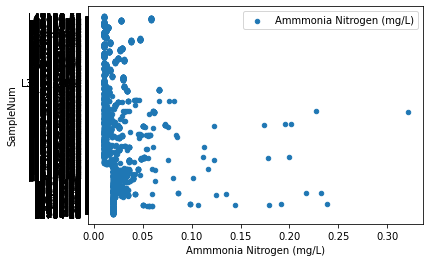

In [47]:
# ugly scatter plot of x="Ammmonia Nitrogen (mg/L)", y="SampleNum"
import matplotlib.pyplot as plt
plt.close("all")

ax = df_3.plot.scatter(x="Ammmonia Nitrogen (mg/L)", y="SampleNum" , label="Ammmonia Nitrogen (mg/L)")
ax.plot();
#df_3.plot.scatter(x="c", y="d", color="DarkGreen", label="Group 2", ax=ax);

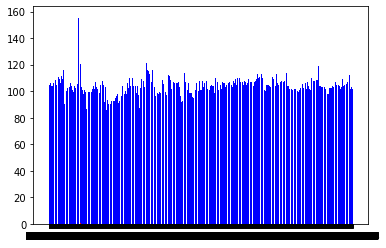

In [69]:
# ugly stacked bar chart
import matplotlib.pyplot as plt
plt.close("all")

labels = df_3["SampleNum"]
values1 = df_3["Ammmonia Nitrogen (mg/L)"]
values2 = df_3["Conductivity (µmhos/cm)"]

fig, ax = plt.subplots()

ax.bar(labels, values1, label='Ammmonia Nitrogen (mg/L', color='r')
ax.bar(labels, values2, label='Conductivity (µmhos/cm', bottom=values1, color='b')

plt.show()


In [48]:
# statistics for each column